In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os

from scipy import stats
import researchpy as rp
from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

Load data.

In [9]:
lrraw_clip = pd.read_pickle("./lrraw_clip.pkl") #logistic regression without lmus
lrlmu_clip = pd.read_pickle("./lrlmu_clip.pkl") #logistic regression with lmus
mlpraw_clip = pd.read_pickle("./mlpraw_clip.pkl") #mlp without lmus
mlplmu_clip = pd.read_pickle("./mlplmu_clip.pkl") #mlp without lmus

# Frame-by-Frame Classification

## LR Without LMUs

In [10]:
lrraw_highframes=[]
lrraw_midframes=[]
lrraw_lowframes=[]
lrraw_randframes=[]
for i in range(20):
    a=np.vstack(lrraw_clip['prediction_prob_high'][i])
    lrraw_highframes.append(a)
    
    b=np.vstack(lrraw_clip['prediction_prob_mid'][i])
    lrraw_midframes.append(b)
    
    c=np.vstack(lrraw_clip['prediction_prob_low'][i])
    lrraw_lowframes.append(c)
    
    d=np.vstack(lrraw_clip['prediction_prob_random'][i])
    lrraw_randframes.append(d)
    
lrraw_highframes_all = np.vstack(lrraw_highframes)
lrraw_midframes_all = np.vstack(lrraw_midframes)
lrraw_lowframes_all = np.vstack(lrraw_lowframes)
lrraw_randframes_all = np.vstack(lrraw_randframes)

Text(0.5, 0.04, 'Probability of High Engagement')

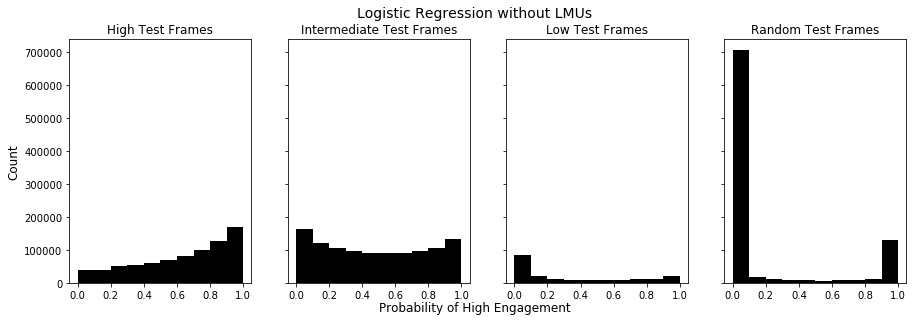

In [11]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = probability of high engagement, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(lrraw_highframes_all[:,1], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(lrraw_midframes_all[:,1], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(lrraw_lowframes_all[:,1], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(lrraw_randframes_all[:,1], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

lrrhigh_cor = (nh[9]/len(lrraw_highframes_all))*100
lrrmid_cor = (nm[5]/len(lrraw_midframes_all))*100
lrrlow_cor = (nl[0]/len(lrraw_lowframes_all))*100

fig.suptitle('Logistic Regression without LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Probability of High Engagement', ha='center', fontsize=12)

## LR With LMUs

In [ ]:
lrlmu_highframes=[]
lrlmu_midframes=[]
lrlmu_lowframes=[]
lrlmu_randframes=[]
for i in range(20):
    a=np.vstack(lrlmu_clip['prediction_prob_high'][i])
    lrlmu_highframes.append(a)
    
    b=np.vstack(lrlmu_clip['prediction_prob_mid'][i])
    lrlmu_midframes.append(b)
    
    c=np.vstack(lrlmu_clip['prediction_prob_low'][i])
    lrlmu_lowframes.append(c)
    
    d=np.vstack(lrlmu_clip['prediction_prob_random'][i])
    lrlmu_randframes.append(d)
    
lrlmu_highframes_all = np.vstack(lrlmu_highframes)
lrlmu_midframes_all = np.vstack(lrlmu_midframes)
lrlmu_lowframes_all = np.vstack(lrlmu_lowframes)
lrlmu_randframes_all = np.vstack(lrlmu_randframes)

In [ ]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = probability of high engagement, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(lrlmu_highframes_all[:,1], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(lrlmu_midframes_all[:,1], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(lrlmu_lowframes_all[:,1], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(lrlmu_randframes_all[:,1], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

lrlhigh_cor = (nh[9]/len(lrlmu_highframes_all))*100
lrlmid_cor = (nm[5]/len(lrlmu_midframes_all))*100
lrllow_cor = (nl[0]/len(lrlmu_lowframes_all))*100

fig.suptitle('Logistic Regression with LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Probability of High Engagement', ha='center', fontsize=12)

## MLP Without LMUs

In [ ]:
mlpraw_highframes=[]
mlpraw_midframes=[]
mlpraw_lowframes=[]
mlpraw_randframes=[]
for i in range(20):
    a=np.vstack(mlpraw_clip['decision_high'][i])
    mlpraw_highframes.append(a)
    
    b=np.vstack(mlpraw_clip['decision_mid'][i])
    mlpraw_midframes.append(b)
    
    c=np.vstack(mlpraw_clip['decision_low'][i])
    mlpraw_lowframes.append(c)
    
    d=np.vstack(mlpraw_clip['decision_random'][i])
    mlpraw_randframes.append(d)
    
mlpraw_highframes_all = np.vstack(mlpraw_highframes)
mlpraw_midframes_all = np.vstack(mlpraw_midframes)
mlpraw_lowframes_all = np.vstack(mlpraw_lowframes)
mlpraw_randframes_all = np.vstack(mlpraw_randframes)

In [ ]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = decision score, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(mlpraw_highframes_all[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mlpraw_midframes_all[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(mlpraw_lowframes_all[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(mlpraw_randframes_all[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

mlprhigh_cor = (nh[9]/len(mlpraw_highframes_all))*100
mlprmid_cor = (nm[5]/len(mlpraw_midframes_all))*100
mlprlow_cor = (nl[0]/len(mlpraw_lowframes_all))*100

fig.suptitle('MLP without LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Decision Score', ha='center', fontsize=12)

## MLP With LMUs

In [ ]:
mlplmu_highframes=[]
mlplmu_midframes=[]
mlplmu_lowframes=[]
mlplmu_randframes=[]
for i in range(20):
    a=np.vstack(mlplmu_clip['decision_high'][i])
    mlplmu_highframes.append(a)
    
    b=np.vstack(mlplmu_clip['decision_mid'][i])
    mlplmu_midframes.append(b)
    
    c=np.vstack(mlplmu_clip['decision_low'][i])
    mlplmu_lowframes.append(c)
    
    d=np.vstack(mlplmu_clip['decision_random'][i])
    mlplmu_randframes.append(d)
    
mlplmu_highframes_all = np.vstack(mlplmu_highframes)
mlplmu_midframes_all = np.vstack(mlplmu_midframes)
mlplmu_lowframes_all = np.vstack(mlplmu_lowframes)
mlplmu_randframes_all = np.vstack(mlplmu_randframes)

In [ ]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = decision score, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(mlplmu_highframes_all[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mlplmu_midframes_all[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(mlplmu_lowframes_all[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(mlplmu_randframes_all[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

mlplhigh_cor = (nh[9]/len(mlplmu_highframes_all))*100
mlplmid_cor = (nm[5]/len(mlplmu_midframes_all))*100
mlpllow_cor = (nl[0]/len(mlplmu_lowframes_all))*100

fig.suptitle('MLP with LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Decision Score', ha='center', fontsize=12)

In [ ]:
Percent_Correct_Frames = pd.DataFrame({'LR w/o LMU % Correct': [f'{lrrhigh_cor:.2f}'+'%',
                                                  f'{lrrmid_cor:.2f}'+'%',
                                                  f'{lrrlow_cor:.2f}'+'%'],
                                'LR with LMU % Correct': [f'{lrlhigh_cor:.2f}'+'%',
                                                  f'{lrlmid_cor:.2f}'+'%',
                                                  f'{lrllow_cor:.2f}'+'%'],
                                'MLP w/o LMU % Correct': [f'{mlprhigh_cor:.2f}'+'%',
                                                  f'{mlprmid_cor:.2f}'+'%',
                                                  f'{mlprlow_cor:.2f}'+'%'],
                                'MLP with LMU % Correct': [f'{lrlhigh_cor:.2f}'+'%',
                                                  f'{mlplmid_cor:.2f}'+'%',
                                                  f'{mlpllow_cor:.2f}'+'%']})

Percent_Correct_Frames.set_index([pd.Index(['High Engagement', 'Intermediate Engagement', 'Low Engagement'])])

# Mean Output for each Clip separated by Class

Calculate and Collect Summary Statistics

Logistic Regression without LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [ ]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrraw_clip)):
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrraw_summary=np.asarray(high_summary)
mid_lrraw_summary=np.asarray(mid_summary)
low_lrraw_summary=np.asarray(low_summary)
random_lrraw_summary=np.asarray(random_summary)
summaries_lrraw=np.asarray(summaries)

Logistic Regression with LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [ ]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrlmu_clip)):
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrlmu_summary=np.asarray(high_summary)
mid_lrlmu_summary=np.asarray(mid_summary)
low_lrlmu_summary=np.asarray(low_summary)
random_lrlmu_summary=np.asarray(random_summary)
summaries_lrlmu=np.asarray(summaries)

MLP without LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [ ]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlpraw_clip)):
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_high'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlpraw_clip.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_low'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_random'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlpraw_summary=np.asarray(high_summary)
mid_mlpraw_summary=np.asarray(mid_summary)
low_mlpraw_summary=np.asarray(low_summary)
random_mlpraw_summary=np.asarray(random_summary)
summaries_mlpraw=np.asarray(summaries)

MLP with LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [ ]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlplmu_clip)):
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_high'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlplmu_clip.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_low'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_random'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlplmu_summary=np.asarray(high_summary)
mid_mlplmu_summary=np.asarray(mid_summary)
low_mlplmu_summary=np.asarray(low_summary)
random_mlplmu_summary=np.asarray(random_summary)
summaries_mlplmu=np.asarray(summaries)

## Logistic Regression Without LMUs

In [ ]:
#Plot the mean probability that each test clip would be 
#classed as Noplay across all 20 experiments
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean prediction probability, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_lrraw_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mid_lrraw_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_lrraw_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_lrraw_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

lrrhigh_cor = (nh[9]/len(high_lrraw_summary))*100
lrrmid_cor = (nm[5]/len(mid_lrraw_summary))*100
lrrlow_cor = (nl[0]/len(low_lrraw_summary))*100

fig.suptitle('Logistic Regression without LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Mean Probability of High', ha='center', fontsize=12)

## Logistic Regression With LMUs

In [ ]:
#Plot the mean probability that each test clip would be 
#classed as Noplay across all 20 experiments
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean prediction probability, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_lrlmu_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mid_lrlmu_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_lrlmu_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_lrlmu_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

lrlhigh_cor = (nh[9]/len(high_lrlmu_summary))*100
lrlmid_cor = (nm[5]/len(mid_lrlmu_summary))*100
lrllow_cor = (nl[0]/len(low_lrlmu_summary))*100

fig.suptitle('Logistic Regression with LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Mean Probability of High', ha='center', fontsize=12)

## MLP Without LMUs

In [ ]:
#Plot the mean decision value for each clip
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean decision value, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_mlpraw_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mid_mlpraw_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_mlpraw_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_mlpraw_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

mlprhigh_cor = (nh[9]/len(high_mlpraw_summary))*100
mlprmid_cor = (nm[5]/len(mid_mlpraw_summary))*100
mlprlow_cor = (nl[0]/len(low_mlpraw_summary))*100

fig.suptitle('MLP without LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Mean Decision Value', ha='center', fontsize=12)

## MLP With LMUs

In [ ]:
#Plot the mean decision value for each clip
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean decision value, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_mlplmu_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=12)
(nm, bins, plot) = ax2.hist(mid_mlplmu_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_mlplmu_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_mlplmu_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

mlplhigh_cor = (nh[9]/len(high_mlplmu_summary))*100
mlplmid_cor = (nm[5]/len(mid_mlplmu_summary))*100
mlpllow_cor = (nl[0]/len(low_mlplmu_summary))*100

fig.suptitle('MLP with LMUs', fontsize=14)
fig.text(0.5, 0.04, 'Mean Decision Value', ha='center', fontsize=12)

In [ ]:
Percent_Correct_Clips = pd.DataFrame({'LR w/o LMU % Correct': [f'{lrrhigh_cor:.2f}'+'%',
                                                  f'{lrrmid_cor:.2f}'+'%',
                                                  f'{lrrlow_cor:.2f}'+'%'],
                                'LR with LMU % Correct': [f'{lrlhigh_cor:.2f}'+'%',
                                                  f'{lrlmid_cor:.2f}'+'%',
                                                  f'{lrllow_cor:.2f}'+'%'],
                                'MLP w/o LMU % Correct': [f'{mlprhigh_cor:.2f}'+'%',
                                                  f'{mlprmid_cor:.2f}'+'%',
                                                  f'{mlprlow_cor:.2f}'+'%'],
                                'MLP with LMU % Correct': [f'{lrlhigh_cor:.2f}'+'%',
                                                  f'{mlplmid_cor:.2f}'+'%',
                                                  f'{mlpllow_cor:.2f}'+'%']})

Percent_Correct_Clips.set_index([pd.Index(['High Engagement', 'Intermediate Engagement', 'Low Engagement'])])

# Classifier Output across Clip Timeline

## Logistic Regression Without LMUs
Plot probability of high classification across timeline of each clip

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
for j in range(20): # for each experiment create 1 plot    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4.5))
    for i in range(18): # for each clip plot 1 line
        a=lrraw_clip.iloc[j]['prediction_prob_high'][i]
        ax1.plot(a[:,1])
        ax1.set_xlim(0,1000)
        ax1.set_ylabel('Probability of High', fontsize=12)
        ax1.set_xlabel('Frame', fontsize=12)
        ax1.title.set_text('High Clips Exp %s' % j)
        
        b=lrraw_clip.iloc[j]['prediction_prob_mid'][i]
        ax2.plot(b[:,1])
        ax2.set_xlim(0,1000)
        ax2.set_xlabel('Frame', fontsize=12)
        ax2.title.set_text('Intermediate Clips Exp %s' % j)
        
        c=lrraw_clip.iloc[j]['prediction_prob_low'][i]
        ax3.plot(c[:,1])
        ax3.set_xlim(0,1000)
        ax3.set_xlabel('Frame', fontsize=12)
        ax3.title.set_text('Low Clips Exp %s' % j)
        
        d=lrraw_clip.iloc[j]['prediction_prob_random'][i]
        ax4.plot(d[:,1])
        ax4.set_xlim(0,1000)
        ax4.set_xlabel('Frame', fontsize=12)
        ax4.title.set_text('Random Clips Exp %s' % j)

## Logistic Regression With LMUs
Plot probability of high classification across timeline of each clip

In [ ]:
for j in range(20): # for each experiment create 1 plot    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4.5))
    for i in range(18): # for each clip plot 1 line
        a=lrlmu_clip.iloc[j]['prediction_prob_high'][i]
        ax1.plot(a[:,1])
        ax1.set_xlim(0,1000)
        ax1.set_ylabel('Probability of High', fontsize=12)
        ax1.set_xlabel('Frame', fontsize=12)
        ax1.title.set_text('High Clips Exp %s' % j)
        
        b=lrlmu_clip.iloc[j]['prediction_prob_mid'][i]
        ax2.plot(b[:,1])
        ax2.set_xlim(0,1000)
        ax2.set_xlabel('Frame', fontsize=12)
        ax2.title.set_text('Intermediate Clips Exp %s' % j)
        
        c=lrlmu_clip.iloc[j]['prediction_prob_low'][i]
        ax3.plot(c[:,1])
        ax3.set_xlim(0,1000)
        ax3.set_xlabel('Frame', fontsize=12)
        ax3.title.set_text('Low Clips Exp %s' % j)
        
        d=lrlmu_clip.iloc[j]['prediction_prob_random'][i]
        ax4.plot(d[:,1])
        ax4.set_xlim(0,1000)
        ax4.set_xlabel('Frame', fontsize=12)
        ax4.title.set_text('Random Clips Exp %s' % j)

## MLP Without LMUs
Plot decision value across timeline of each clip

In [ ]:
for j in range(20): # for each experiment create 1 plot    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4.5))
    for i in range(18): # for each clip plot 1 line
        a=mlpraw_clip.iloc[j]['decision_high'][i]
        ax1.plot(a[:,0])
        ax1.set_xlim(0,1000)
        ax1.set_ylabel('Decision Value', fontsize=12)
        ax1.set_xlabel('Frame', fontsize=12)
        ax1.title.set_text('High Clips Exp %s' % j)
        
        b=mlpraw_clip.iloc[j]['decision_mid'][i]
        ax2.plot(b[:,0])
        ax2.set_xlim(0,1000)
        ax2.set_xlabel('Frame', fontsize=12)
        ax2.title.set_text('Intermediate Clips Exp %s' % j)
        
        c=mlpraw_clip.iloc[j]['decision_low'][i]
        ax3.plot(c[:,0])
        ax3.set_xlim(0,1000)
        ax3.set_xlabel('Frame', fontsize=12)
        ax3.title.set_text('Low Clips Exp %s' % j)
        
        d=mlpraw_clip.iloc[j]['decision_random'][i]
        ax4.plot(d[:,0])
        ax4.set_xlim(0,1000)
        ax4.set_xlabel('Frame', fontsize=12)
        ax4.title.set_text('Random Clips Exp %s' % j)

## MLP With LMUs
Plot decision value across timeline of each clip

In [ ]:
for j in range(20): # for each experiment create 1 plot    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4.5))
    for i in range(18): # for each clip plot 1 line
        a=mlplmu_clip.iloc[j]['decision_high'][i]
        ax1.plot(a[:,0])
        ax1.set_xlim(0,1000)
        ax1.set_ylabel('Decision Value', fontsize=12)
        ax1.set_xlabel('Frame', fontsize=12)
        ax1.title.set_text('High Clips Exp %s' % j)
        
        b=mlplmu_clip.iloc[j]['decision_mid'][i]
        ax2.plot(b[:,0])
        ax2.set_xlim(0,1000)
        ax2.set_xlabel('Frame', fontsize=12)
        ax2.title.set_text('Intermediate Clips Exp %s' % j)
        
        c=mlplmu_clip.iloc[j]['decision_low'][i]
        ax3.plot(c[:,0])
        ax3.set_xlim(0,1000)
        ax3.set_xlabel('Frame', fontsize=12)
        ax3.title.set_text('Low Clips Exp %s' % j)
        
        d=mlplmu_clip.iloc[j]['decision_random'][i]
        ax4.plot(d[:,0])
        ax4.set_xlim(0,1000)
        ax4.set_xlabel('Frame', fontsize=12)
        ax4.title.set_text('Random Clips Exp %s' % j)

# Cluster Plots of Summary Statistics for each Class

## Logistic Regression Without LMUs

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_lrraw_summary[:,0],high_lrraw_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_lrraw_summary[:,0],low_lrraw_summary[:,1], alpha=0.7, color='grey', label='low')
ax1.set_xlabel('Mean', fontsize=12)
ax1.set_ylabel('STD', fontsize=12)
ax1.legend(loc=(1,0))
ax1.title.set_text('Mean and STD for High and Low Clips')

ax2.scatter(high_lrraw_summary[:,0],high_lrraw_summary[:,1], alpha=0.7, color='black', label='high')
ax2.scatter(mid_lrraw_summary[:,0],mid_lrraw_summary[:,1], alpha=0.7, color='orange', label='intermediate')
ax2.scatter(low_lrraw_summary[:,0],low_lrraw_summary[:,1], alpha=0.7, color='grey', label='low')
ax2.scatter(random_lrraw_summary[:,0],random_lrraw_summary[:,1], alpha=0.7, color='blue', label='random')
ax2.set_xlabel('Mean', fontsize=12)
ax2.set_ylabel('STD', fontsize=12)
ax2.legend(loc=(1,0))
ax2.title.set_text('Mean and STD for All Clips')

In [ ]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter(high_lrraw_summary[:,0],high_lrraw_summary[:,1],high_lrraw_summary[:,2], alpha=0.7, color='black', label='high')
ax.scatter(mid_lrraw_summary[:,0],mid_lrraw_summary[:,1],mid_lrraw_summary[:,2], alpha=0.7, color='orange', label='intermediate')
ax.scatter(low_lrraw_summary[:,0],low_lrraw_summary[:,1],low_lrraw_summary[:,2], alpha=0.7, color='grey', label='low')
ax.scatter(random_lrraw_summary[:,0],random_lrraw_summary[:,1],random_lrraw_summary[:,2], alpha=0.7, color='blue', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>
First calculate baseline - how well would our classifier generates predictions by respecting the training set’s class distribution?

In [ ]:
X = summaries_lrraw[:,:4]
X = X.astype(np.float)
y = summaries_lrraw[:,4]
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.predict(X)

print('Baseline Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Score: ', dummy_clf.score(X, y))

print(dummy_clf.classes_)
y_pred = dummy_clf.predict(X)  
print(confusion_matrix(y, y_pred))

Now we do it for real.

In [ ]:
X = summaries_lrraw[:,:4]
X = X.astype(np.float)
y = summaries_lrraw[:,4]

print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
print('Score: ', clf.score(X, y))

print(clf.classes_)
y_pred = clf.predict(X)  
print(confusion_matrix(y, y_pred))

## Logistic Regression With LMUs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_lrlmu_summary[:,0], high_lrlmu_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_lrlmu_summary[:,0], low_lrlmu_summary[:,1], alpha=0.7, color='grey', label='low')
ax1.set_xlabel('Mean', fontsize=12)
ax1.set_ylabel('STD', fontsize=12)
ax1.legend(loc=(1,0))
ax1.title.set_text('Mean and STD for Goal and Noplay clips')

ax2.scatter(high_lrlmu_summary[:,0], high_lrlmu_summary[:,1], alpha=0.7, color='black', label='high')
ax2.scatter(mid_lrlmu_summary[:,0], mid_lrlmu_summary[:,1], alpha=0.7, color='orange', label='intermediate')
ax2.scatter(low_lrlmu_summary[:,0], low_lrlmu_summary[:,1], alpha=0.7, color='grey', label='low')
ax2.scatter(random_lrlmu_summary[:,0],random_lrlmu_summary[:,1], alpha=0.7, color='blue', label='random')
ax2.set_xlabel('Mean', fontsize=12)
ax2.set_ylabel('STD', fontsize=12)
ax2.legend(loc=(1,0))
ax2.title.set_text('Mean and STD for All Clips')

In [ ]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter(high_lrlmu_summary[:,0],high_lrlmu_summary[:,1],high_lrlmu_summary[:,2], alpha=0.7, color='black', label='high')
ax.scatter(mid_lrlmu_summary[:,0],mid_lrlmu_summary[:,1],mid_lrlmu_summary[:,2], alpha=0.7, color='orange', label='intermediate')
ax.scatter(low_lrlmu_summary[:,0],low_lrlmu_summary[:,1],low_lrlmu_summary[:,2], alpha=0.7, color='grey', label='low')
ax.scatter(random_lrlmu_summary[:,0],random_lrlmu_summary[:,1],random_lrlmu_summary[:,2], alpha=0.7, color='blue', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>
First calculate baseline - how well would our classifier generates predictions by respecting the training set’s class distribution?

In [ ]:
X = summaries_lrlmu[:,:4]
X = X.astype(np.float)
y = summaries_lrlmu[:,4]
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.predict(X)

print('Baseline Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Score: ', dummy_clf.score(X, y))

print(dummy_clf.classes_)
y_pred = dummy_clf.predict(X)  
print(confusion_matrix(y, y_pred))

Now we do it for real.

In [ ]:
X = summaries_lrlmu[:,:4]
X = X.astype(np.float)
y = summaries_lrlmu[:,4]

print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
print('Score: ', clf.score(X, y))

print(clf.classes_)
y_pred = clf.predict(X)  
print(confusion_matrix(y, y_pred))

## MLP Without LMUs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_mlpraw_summary[:,0],high_mlpraw_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_mlpraw_summary[:,0],low_mlpraw_summary[:,1], alpha=0.7, color='grey', label='low')
ax1.set_xlabel('Mean', fontsize=12)
ax1.set_ylabel('STD', fontsize=12)
ax1.legend(loc=(1,0))
ax1.title.set_text('Mean and STD for Goal and Noplay clips')

ax2.scatter(high_mlpraw_summary[:,0],high_mlpraw_summary[:,1], alpha=0.7, color='black', label='high')
ax2.scatter(mid_mlpraw_summary[:,0],mid_mlpraw_summary[:,1], alpha=0.7, color='orange', label='intermediate')
ax2.scatter(low_mlpraw_summary[:,0],low_mlpraw_summary[:,1], alpha=0.7, color='grey', label='low')
ax2.scatter(random_mlpraw_summary[:,0],random_mlpraw_summary[:,1], alpha=0.7, color='blue', label='random')
ax2.set_xlabel('Mean', fontsize=12)
ax2.set_ylabel('STD', fontsize=12)
ax2.legend(loc=(1,0))
ax2.title.set_text('Mean and STD for All Clips')

In [ ]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter(high_mlpraw_summary[:,0],high_mlpraw_summary[:,1],high_mlpraw_summary[:,2], alpha=0.7, color='black', label='high')
ax.scatter(mid_mlpraw_summary[:,0],mid_mlpraw_summary[:,1],mid_mlpraw_summary[:,2], alpha=0.7, color='orange', label='intermediate')
ax.scatter(low_mlpraw_summary[:,0],low_mlpraw_summary[:,1],low_mlpraw_summary[:,2], alpha=0.7, color='grey', label='low')
ax.scatter(random_mlpraw_summary[:,0],random_mlpraw_summary[:,1],random_mlpraw_summary[:,2], alpha=0.7, color='blue', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>
First calculate baseline - how well would our classifier generates predictions by respecting the training set’s class distribution?

In [ ]:
X = summaries_mlpraw[:,:4]
X = X.astype(np.float)
y = summaries_mlpraw[:,4]
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.predict(X)

print('Baseline Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Score: ', dummy_clf.score(X, y))

print(dummy_clf.classes_)
y_pred = dummy_clf.predict(X)  
print(confusion_matrix(y, y_pred))

Now we do it for real.

In [ ]:
X = summaries_mlpraw[:,:4]
X = X.astype(np.float)
y = summaries_mlpraw[:,4]

print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
print('Score: ', clf.score(X, y))

print(clf.classes_)
y_pred = clf.predict(X)  
print(confusion_matrix(y, y_pred))

## MLP With LMUs

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_mlplmu_summary[:,0],high_mlplmu_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_mlplmu_summary[:,0],low_mlplmu_summary[:,1], alpha=0.7, color='grey', label='low')
ax1.set_xlabel('Mean', fontsize=12)
ax1.set_ylabel('STD', fontsize=12)
ax1.legend(loc=(1,0))
ax1.title.set_text('Mean and STD for Goal and Noplay clips')

ax2.scatter(high_mlplmu_summary[:,0],high_mlplmu_summary[:,1], alpha=0.7, color='black', label='high')
ax2.scatter(mid_mlplmu_summary[:,0],mid_mlplmu_summary[:,1], alpha=0.7, color='orange', label='intermediate')
ax2.scatter(low_mlplmu_summary[:,0],low_mlplmu_summary[:,1], alpha=0.7, color='grey', label='low')
ax2.scatter(random_mlplmu_summary[:,0],random_mlplmu_summary[:,1], alpha=0.7, color='blue', label='random')
ax2.set_xlabel('Mean', fontsize=12)
ax2.set_ylabel('STD', fontsize=12)
ax2.legend(loc=(1,0))
ax2.title.set_text('Mean and STD for All Clips')

In [ ]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter(high_mlplmu_summary[:,0],high_mlplmu_summary[:,1],high_mlplmu_summary[:,2], alpha=0.7, color='black', label='high')
ax.scatter(mid_mlplmu_summary[:,0],mid_mlplmu_summary[:,1],mid_mlplmu_summary[:,2], alpha=0.7, color='orange', label='intermediate')
ax.scatter(low_mlplmu_summary[:,0],low_mlplmu_summary[:,1],low_mlplmu_summary[:,2], alpha=0.7, color='grey', label='low')
ax.scatter(random_mlplmu_summary[:,0],random_mlplmu_summary[:,1],random_mlplmu_summary[:,2], alpha=0.7, color='blue', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>
First calculate baseline - how well would our classifier generates predictions by respecting the training set’s class distribution?

In [ ]:
X = summaries_mlplmu[:,:4]
X = X.astype(np.float)
y = summaries_mlplmu[:,4]
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.predict(X)

print('Baseline Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Score: ', dummy_clf.score(X, y))

print(dummy_clf.classes_)
y_pred = dummy_clf.predict(X)  
print(confusion_matrix(y, y_pred))

Now we do it for real.

In [ ]:
X = summaries_mlplmu[:,:4]
X = X.astype(np.float)
y = summaries_mlplmu[:,4]

print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
print('Score: ', clf.score(X, y))

print(clf.classes_)
y_pred = clf.predict(X)  
print(confusion_matrix(y, y_pred))